In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dfX = pd.read_csv("X_train.csv")

In [16]:
dfy = pd.read_csv("y_train.csv")

## Learning More About the Data

In [27]:
cols_log = ["market_cap", "employees", "revenue", "scope_1", "scope_2", "scope_3", "waste_production", "waste_recycling", "water_consumption", "water_withdrawal","energy_consumption", "hours_of_training","legal_costs_paid_for_controversies","ceo_compensation"]
cols_oth = ["anonimized_id", "company_id","year","region","headquarters_country","industry","gender_pay_gap","independent_board_members_percentage"]

In [24]:
dfX.columns

Index(['Unnamed: 0', 'anonimized_id', 'company_id', 'year', 'region',
       'headquarters_country', 'industry', 'market_cap', 'employees',
       'revenue', 'scope_1', 'scope_2', 'scope_3', 'waste_production',
       'waste_recycling', 'water_consumption', 'water_withdrawal',
       'energy_consumption', 'hours_of_training', 'gender_pay_gap',
       'independent_board_members_percentage',
       'legal_costs_paid_for_controversies', 'ceo_compensation'],
      dtype='object')

In [21]:
dfX.describe()

,Unnamed: 0,year,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
count,15000.000000,15000.000000,1.500000e+04,10614.000000,12498.000000,4.275000e+03,4.260000e+03,3.900000e+03,1.918000e+03,1.310000e+03,3.601000e+03,3.366000e+03,2.270000e+03,1.590000e+03,543.000000,3174.000000,5192.000000,1.057000e+03
mean,7499.500000,2019.000000,8.423237e+03,16116.073111,4434.133569,1.745188e+06,5.531350e+05,1.639751e+07,6.324003e+06,1.658642e+05,3.085232e+07,1.641575e+08,5.865043e+07,1.082183e+06,2.792827,0.596120,38.822194,7.411698e+06
std,4330.271354,0.816524,4.987644e+04,42258.719275,15362.161446,1.306716e+07,8.772001e+06,3.881127e+08,7.914106e+07,9.802639e+05,9.725999e+08,2.557728e+09,1.748249e+09,5.886039e+06,6.508839,0.264003,319.484605,1.104098e+07
min,0.000000,2018.000000,3.656800e+02,1.000000,-8257.940000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.777778e-03,8.000000e-01,-8.100000,0.000064,0.000000,9.768000e+03
25%,3749.750000,2018.000000,9.912200e+02,1500.000000,302.565000,1.056000e+03,3.001500e+03,2.752750e+03,3.860750e+03,1.949750e+03,1.120450e+05,2.169376e+05,1.217374e+05,1.252950e+04,0.796000,0.400000,0.000000,1.693000e+06
50%,7499.500000,2019.000000,1.889205e+03,4342.500000,885.225000,1.184500e+04,2.373950e+04,2.775050e+04,2.724550e+04,1.645050e+04,6.100000e+05,1.134632e+06,6.518394e+05,1.445640e+05,0.953200,0.607500,0.000000,3.826000e+06
75%,11249.250000,2020.000000,4.766880e+03,12792.750000,2936.880000,1.195165e+05,1.232912e+05,3.029490e+05,1.646960e+05,9.475000e+04,3.785000e+06,6.431954e+06,3.372001e+06,6.731735e+05,1.000000,0.830000,4.352500,9.833511e+06
max,14999.000000,2020.000000,2.251352e+06,969696.000000,410650.320000,3.394229e+08,3.394229e+08,1.679000e+10,2.264325e+09,2.277325e+07,5.794390e+10,7.200000e+10,8.167006e+10,1.482950e+08,40.000000,1.000000,14830.200000,2.111312e+08


In [18]:
dfy.describe()

,Unnamed: 0,year,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
count,15000.000000,15000.000000,1.500000e+04,12487.000000,14703.000000,5.029000e+03,5.011000e+03,4.588000e+03,2.256000e+03,1.541000e+03,4.236000e+03,3.960000e+03,2.670000e+03,1.870000e+03,643.000000,3734.000000,6108.000000,1.243000e+03
mean,7499.500000,2019.000000,8.423237e+03,16160.774485,4452.430458,1.628980e+06,5.290821e+05,1.507162e+07,7.685792e+06,1.937869e+05,4.643705e+07,1.681409e+08,5.168054e+07,1.061094e+06,2.868620,0.598596,39.341377,7.284989e+06
std,4330.271354,0.816524,4.987644e+04,42612.667732,15257.249667,1.257112e+07,8.165526e+06,3.592031e+08,9.388555e+07,1.187292e+06,1.246839e+09,2.481248e+09,1.612081e+09,5.506665e+06,6.587364,0.263864,311.673363,1.065159e+07
min,0.000000,2018.000000,3.656800e+02,1.000000,-8257.940000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.777778e-03,0.000000e+00,-8.100000,0.000064,0.000000,9.768000e+03
25%,3749.750000,2018.000000,9.912200e+02,1500.000000,300.665000,1.020000e+03,2.935560e+03,2.752750e+03,4.089000e+03,2.059000e+03,1.116717e+05,2.206414e+05,1.209085e+05,1.460775e+04,0.798300,0.400000,0.000000,1.665600e+06
50%,7499.500000,2019.000000,1.889205e+03,4368.000000,890.190000,1.181700e+04,2.356100e+04,2.726000e+04,2.824395e+04,1.664700e+04,6.045725e+05,1.174083e+06,6.340690e+05,1.502130e+05,0.953200,0.615390,0.000000,3.806000e+06
75%,11249.250000,2020.000000,4.766880e+03,12907.000000,2960.310000,1.183000e+05,1.213235e+05,3.089282e+05,1.740860e+05,9.400000e+04,3.787000e+06,6.663092e+06,3.453723e+06,6.682020e+05,1.000000,0.833300,4.322500,9.771572e+06
max,14999.000000,2020.000000,2.251352e+06,969696.000000,410650.320000,3.394229e+08,3.394229e+08,1.679000e+10,2.461882e+09,2.487460e+07,5.794390e+10,7.200000e+10,8.167006e+10,1.482950e+08,40.000000,1.000000,14830.200000,2.111312e+08


In [7]:
dfX["region"].value_counts()

Asia / Pacific                 8322
United States and Canada       3339
Europe                         2175
Africa / Middle East            642
Latin America and Caribbean     522
Name: region, dtype: int64

In [8]:
dfX["year"].value_counts()

2020    5000
2019    5000
2018    5000
Name: year, dtype: int64

In [9]:
dfX["headquarters_country"].value_counts()

China                   4380
United States           2988
Japan                   1089
India                    678
United Kingdom           426
                        ... 
Tanzania                   3
Isle of Man                3
Papua New Guinea           3
Netherlands Antilles       3
Bulgaria                   3
Name: headquarters_country, Length: 85, dtype: int64

In [10]:
dfX["industry"].value_counts()

Diversified Banks             546
Pharmaceuticals               498
Industrial Machinery          465
Packaged Foods and Meats      405
Application Software          378
                             ... 
Multi-Sector Holdings          12
Retail REITs                    6
Housewares and Specialties      6
Office REITs                    3
Silver                          3
Name: industry, Length: 151, dtype: int64

In [11]:
dfX["ceo_compensation"].mean()

7411697.732412488

In [12]:
100*(dfX.isna().sum().sort_values()/len(dfX))

Unnamed: 0                               0.000000
anonimized_id                            0.000000
company_id                               0.000000
year                                     0.000000
region                                   0.000000
headquarters_country                     0.000000
industry                                 0.000000
market_cap                               0.000000
revenue                                 16.680000
employees                               29.240000
legal_costs_paid_for_controversies      65.386667
scope_1                                 71.500000
scope_2                                 71.600000
scope_3                                 74.000000
water_consumption                       75.993333
water_withdrawal                        77.560000
independent_board_members_percentage    78.840000
energy_consumption                      84.866667
waste_production                        87.213333
hours_of_training                       89.400000


In [28]:
dfX2 = dfX[cols_log]

In [220]:
dfX2log = np.log10(dfX2)
dfX2log.replace([-np.inf], 0, inplace=True)

dfY2 = dfy[cols_log]
dfY2log = np.log10(dfY2)
dfY2log.replace([-np.inf], 0, inplace=True)

C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:352: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:352: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [218]:
dfX2log.corr()

,market_cap,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,legal_costs_paid_for_controversies,ceo_compensation
market_cap,1.000000,0.521012,0.590499,0.035023,0.061794,0.122111,0.149229,0.096132,0.256245,0.250937,0.268321,0.018564,0.372563,0.449320
employees,0.521012,1.000000,0.799912,0.223191,0.281071,0.259769,0.295522,0.333443,0.397555,0.406056,0.325813,0.107482,0.315976,0.298445
revenue,0.590499,0.799912,1.000000,0.262111,0.273869,0.368923,0.287492,0.362668,0.408719,0.456037,0.367953,0.015125,0.377027,0.362588
scope_1,0.035023,0.223191,0.262111,1.000000,0.763218,0.679873,0.299224,0.358725,0.528410,0.613585,0.389266,-0.226418,0.100563,0.122928
scope_2,0.061794,0.281071,0.273869,0.763218,1.000000,0.657427,0.202736,0.287638,0.414871,0.465653,0.260457,-0.227030,0.079474,0.218047
scope_3,0.122111,0.259769,0.368923,0.679873,0.657427,1.000000,0.263344,0.386521,0.478961,0.507205,0.345777,-0.212342,0.136309,0.095748
waste_production,0.149229,0.295522,0.287492,0.299224,0.202736,0.263344,1.000000,0.852519,0.503589,0.458821,0.661230,0.078921,0.190122,0.086316
waste_recycling,0.096132,0.333443,0.362668,0.358725,0.287638,0.386521,0.852519,1.000000,0.467208,0.476365,0.615057,0.023405,0.145651,0.034827
water_consumption,0.256245,0.397555,0.408719,0.528410,0.414871,0.478961,0.503589,0.467208,1.000000,0.769025,0.488501,-0.034091,0.167252,0.152004
water_withdrawal,0.250937,0.406056,0.456037,0.613585,0.465653,0.507205,0.458821,0.476365,0.769025,1.000000,0.484704,-0.062688,0.154609,0.084763


In [133]:
dfX.iloc[1]

Unnamed: 0                                                                         1
anonimized_id                              c67ee84d-5cf4-4cd0-85b9-027ad082748f_2019
company_id                                      c67ee84d-5cf4-4cd0-85b9-027ad082748f
year                                                                            2019
region                                                      United States and Canada
headquarters_country                                                   United States
industry                                Technology Hardware, Storage and Peripherals
market_cap                                                                2251351.65
employees                                                                        NaN
revenue                                                                          NaN
scope_1                                                                      52730.0
scope_2                                                          

In [134]:
dfX2log[["employees","revenue"]].dropna()

,employees,revenue
3,4.824776,5.306933
4,4.897627,5.463674
5,4.883196,5.500753
6,4.849769,4.443191
7,4.681386,4.334930
...,...,...
14987,3.254548,2.584727
14994,3.817036,2.629797
14995,3.813114,2.620927
14996,3.790004,2.602689


In [135]:
dfs = dfX2log[["waste_production","water_consumption"]].dropna()

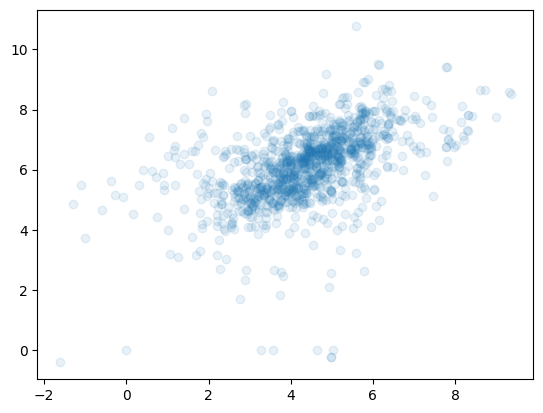

In [136]:
plt.scatter(dfs["waste_production"],dfs["water_consumption"], alpha = 0.1)

In [141]:
mu = dfX2log.mean()

In [142]:
mu

market_cap                            3.405696
employees                             3.626075
revenue                               2.965542
scope_1                               4.044388
scope_2                               4.191739
scope_3                               4.432580
waste_production                      4.380813
waste_recycling                       4.069378
water_consumption                     5.794233
water_withdrawal                      6.118045
energy_consumption                    5.773081
hours_of_training                     4.576073
legal_costs_paid_for_controversies    0.390049
ceo_compensation                      6.583105
dtype: float64

In [143]:
Sigma = np.array(dfX2log.cov())

In [233]:
A = np.array(dfX2log)
z  = A[12]

In [234]:
Aimp = np.copy(A)

In [190]:
y_indices = np.isnan(z)+np.isinf(z) #+ equivalent to "or"
x_indices = np.logical_not(y_indices)

y = z[y_indices]
x = z[x_indices]

Sigmaxx = Sigma[x_indices][:,x_indices]
Sigmayx = Sigma[y_indices][:,x_indices]
mux = mu[x_indices]
muy = mu[y_indices]

In [191]:
muy+Sigmayx.dot(np.linalg.inv(Sigmaxx)).dot(x-mux)

scope_3              8.237857
waste_production     5.632095
waste_recycling      5.294110
water_consumption    8.104391
hours_of_training    4.163851
dtype: float64

In [226]:
np.array(muy+Sigmayx.dot(np.linalg.inv(Sigmaxx)).dot(x-mux))

array([8.23785729, 5.63209462, 5.29411038, 8.10439142, 4.16385054])

In [168]:
10**5.556267

359970.573529212

In [237]:
for i in range(len(A)):
    z = A[i]
    y_indices = np.isnan(z)+np.isinf(z) #+ equivalent to "or"
    x_indices = np.logical_not(y_indices)

    y = z[y_indices]
    x = z[x_indices]

    Sigmaxx = Sigma[x_indices][:,x_indices]
    Sigmayx = Sigma[y_indices][:,x_indices]
    mux = np.array(mu[x_indices])
    muy = np.array(mu[y_indices])
    
    imputed = muy+Sigmayx.dot(np.linalg.inv(Sigmaxx)).dot(x-mux)
    
    
    y_ind = 0
    for j in range(len(z)):
        if y_indices[j]:
            Aimp[i,j] = imputed[y_ind]
            y_ind+=1
            
    
    

In [238]:
print(A[12], Aimp[12])

[5.62434016 4.8573325  5.19913499 8.03342376 6.84509804        nan
        nan        nan        nan 8.66275783 8.61978911        nan
 0.         7.19421067] [5.62434016 4.8573325  5.19913499 8.03342376 6.84509804 8.23785729
 5.63209462 5.29411038 8.10439142 8.66275783 8.61978911 4.16385054
 0.         7.19421067]


In [82]:
x[1]==float("nan")

False

In [81]:
x[1]

nan

array([False,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False, False])

In [85]:
np.isinf(x)+np.isnan(x)

array([False,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False])

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True])

In [171]:
dfX.iloc[12]

Unnamed: 0                                                                     12
anonimized_id                           dd30cf33-74f4-4e0c-97f7-616923b123f0_2020
company_id                                   dd30cf33-74f4-4e0c-97f7-616923b123f0
year                                                                         2020
region                                                   United States and Canada
headquarters_country                                                United States
industry                                                   Integrated Oil and Gas
market_cap                                                              421056.29
employees                                                                 72000.0
revenue                                                                 158173.96
scope_1                                                               108000000.0
scope_2                                                                 7000000.0
scope_3         

In [172]:
dfy.iloc[12]

Unnamed: 0                                                                     12
anonimized_id                           dd30cf33-74f4-4e0c-97f7-616923b123f0_2020
company_id                                   dd30cf33-74f4-4e0c-97f7-616923b123f0
year                                                                         2020
region                                                   United States and Canada
headquarters_country                                                United States
industry                                                   Integrated Oil and Gas
market_cap                                                              421056.29
employees                                                                 72000.0
revenue                                                                 158173.96
scope_1                                                               108000000.0
scope_2                                                                 7000000.0
scope_3         

In [257]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(
        n_estimators=10,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,)

imp =  IterativeImputer(random_state=0, estimator=rfreg, max_iter=50, tol=1e-1)
imp.fit(dfX2log)


C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=RandomForestRegressor(max_depth=10, max_samples=0.5,
                                                 n_estimators=10, n_jobs=2,
                                                 random_state=0),
                 max_iter=50, random_state=0, tol=0.1)

In [258]:
mv = imp.transform(dfX2log)

In [270]:
from sklearn.impute import SimpleImputer
impS = SimpleImputer(missing_values=np.nan, strategy='median')
impS.fit(dfX2log)

uv = impS.transform(dfX2log)

In [269]:
print(np.sum((mv - dfY2log)**2))

market_cap                              0.000000
employees                             548.585557
revenue                               598.902303
scope_1                               727.506748
scope_2                               577.119013
scope_3                               974.724832
waste_production                      263.552895
waste_recycling                        97.867891
water_consumption                     426.122454
water_withdrawal                      311.833637
energy_consumption                    350.100230
hours_of_training                     775.483174
legal_costs_paid_for_controversies    485.058421
ceo_compensation                       40.942201
dtype: float64


In [264]:
print(np.sum((Aimp - dfY2log)**2))

market_cap                              0.000000
employees                             453.919455
revenue                               550.112469
scope_1                               672.242728
scope_2                               615.271303
scope_3                               952.564477
waste_production                      271.323297
waste_recycling                       142.911376
water_consumption                     400.199121
water_withdrawal                      354.863959
energy_consumption                    403.780279
hours_of_training                     815.570502
legal_costs_paid_for_controversies    424.117967
ceo_compensation                       67.518901
dtype: float64


In [271]:
print(np.sum((uv - dfY2log)**2))

market_cap                               0.000000
employees                             1106.888028
revenue                               1350.687431
scope_1                               1815.736997
scope_2                               1339.150379
scope_3                               1744.987822
waste_production                       570.833345
waste_recycling                        348.041005
water_consumption                      849.091599
water_withdrawal                       898.652882
energy_consumption                     673.640169
hours_of_training                      916.108464
legal_costs_paid_for_controversies     716.757610
ceo_compensation                        49.192159
dtype: float64
